In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\kpaps\Desktop\machine_learning_practice\Noor_saeed\isrel_palestine_Conflict Analysis\fatalities.csv')
data.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [3]:
data.shape

(11124, 16)

### Important Information

In [4]:
citizenship_counts = data['citizenship'].value_counts()
event_location_region = data['event_location_region'].value_counts()
hostilities_counts = data[data['took_part_in_the_hostilities'] == 'Yes']['citizenship'].value_counts()
no_hostilities_counts = data[data['took_part_in_the_hostilities'] == 'No']['citizenship'].value_counts()

### Types OF Fires

<Axes: xlabel='type_of_injury'>

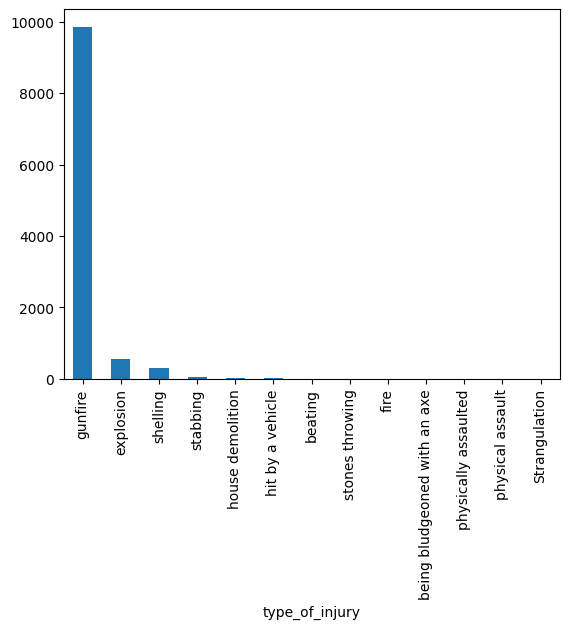

In [5]:
data['type_of_injury'].value_counts().plot(kind='bar')

### Summary Statistics for Age

In [6]:
data.age.describe()

count    10995.000000
mean        26.745703
std         13.780548
min          1.000000
25%         19.000000
50%         23.000000
75%         31.000000
max        112.000000
Name: age, dtype: float64

### Group data by 'event_location_region' and count incidents

<Axes: xlabel='event_location_region'>

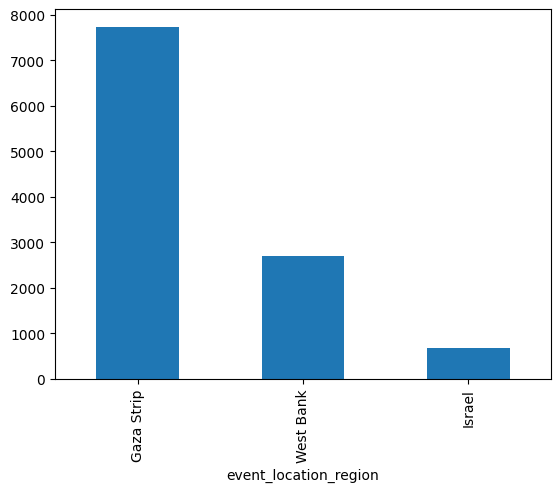

In [7]:

data['event_location_region'].value_counts().plot(kind='bar')

### Count unique values of 'place_of_residence' within each region

<Axes: ylabel='place_of_residence'>

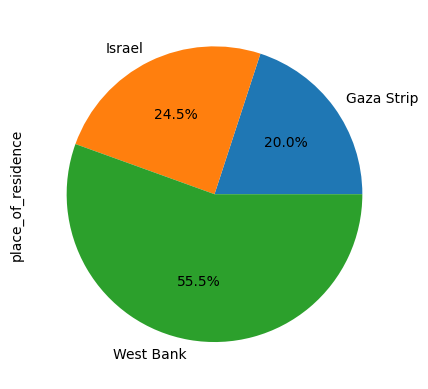

In [12]:

data.groupby('event_location_region')['place_of_residence'].nunique().plot(kind='pie',autopct='%1.1f%%')

### Calculate average age by 'event_location_region'

In [9]:
data.groupby('event_location_region')['age'].mean()

event_location_region
Gaza Strip    26.020224
Israel        36.286776
West Bank     26.421746
Name: age, dtype: float64

### Visualize the types of injuries using Matplotlib

<Axes: ylabel='count'>

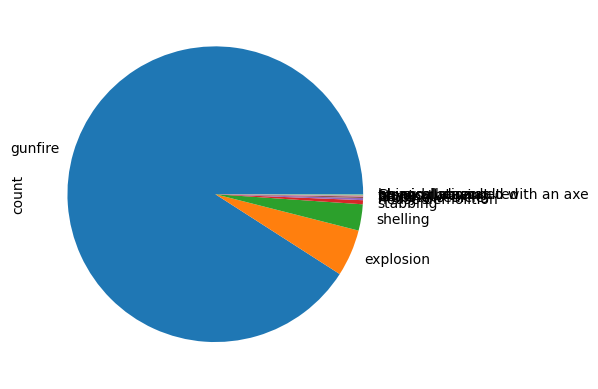

In [10]:

data['type_of_injury'].value_counts().plot(kind='pie')

### Grouping by 'citizenship' to find out how many incidents involve each nationality

In [11]:
def nationality_incident(df):
    nationalityIncident = df.groupby('citizenship').size().reset_index(name='incident_count')
    return nationalityIncident
nationality_incident(data)

,citizenship,incident_count
0,American,1
1,Israeli,1029
2,Jordanian,2
3,Palestinian,10092


### Data filtering example: Incidents in a specific region with specific characteristics

In [14]:

data[(data['event_location_region']=='West Bank') & (data['type_of_injury']=='gunfire')]

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11119,Binyamin Herling,2000-10-19,64.0,Israeli,Nablus,Nablus,West Bank,2000-10-19,M,Israelis,Kedumim,Tulkarm,gunfire,live ammunition,Palestinian civilians,Killed while hiking on Mt. Eival.
11120,Farid Musa 'Issa a-Nesasreh,2000-10-17,28.0,Palestinian,Beit Furik,Nablus,West Bank,2000-10-17,M,Unknown,Beit Furik,Nablus,gunfire,NaN,Israeli civilians,Killed by a settler from Itamar while harvesti...
11121,Hillel Lieberman,2000-10-07,36.0,Israeli,Nablus,Nablus,West Bank,2000-10-07,M,Israelis,Elon Moreh,Nablus,gunfire,live ammunition,Palestinian civilians,His body was found a day after he disappeared.
11122,Fahed Mustafa 'Odeh Baker,2000-10-07,21.0,Palestinian,Bidya,Salfit,West Bank,2000-10-07,M,No,Bidya,Salfit,gunfire,NaN,Israeli civilians,Killed by settlers who rioted in Biddya village.


### Grouping by 'gender' to analyze how incidents vary between males and females

In [17]:

# df.groupby('gender').size().reset_index(name='incident_count')
data.groupby('gender').size().reset_index(name='incident_count')

,gender,incident_count
0,F,1423
1,M,9681


### Combining grouping and filtering (example: average age of males and females from a specific nationality involved in specific injuries)

In [18]:
data[(data['citizenship'] == 'Palestinian') & (data['type_of_injury'] == 'stones throwing')].groupby('gender')['age'].mean()


gender
F    45.0
M    47.0
Name: age, dtype: float64

### Time-based analysis (grouping by year and month)

In [19]:
import seaborn as sns
# Time-based analysis (events at specific times)
data['date_of_event'] = pd.to_datetime(data['date_of_event'])
data['year'] = data['date_of_event'].dt.year
data['month'] = data['date_of_event'].dt.month_name()  # Format month as month name
time_events = data.groupby(['year', 'month']).size().reset_index(name='incident_count')
time_events['year_month'] = time_events['month'] + ' ' + time_events['year'].astype(str)
time_events

,year,month,incident_count,year_month
0,2000,December,10,December 2000
1,2000,November,17,November 2000
2,2000,October,8,October 2000
3,2001,April,4,April 2001
4,2001,August,26,August 2001
...,...,...,...,...
262,2023,July,25,July 2023
263,2023,June,24,June 2023
264,2023,March,25,March 2023
265,2023,May,53,May 2023
